# Experiment 001: *Distribution of Playlists and Number of Follower*

In [1]:
'''import standard libraries'''
import numpy as np                       # mathematical methods
from matplotlib import pyplot as plt     # plotting methods within notebook
from scipy import stats                  # lots of statistical methods
import pandas as pd
%matplobtlib inline

UsageError: Line magic function `%matplobtlib` not found.


In [2]:
import os
os.chdir('../')


from src.get_data import get_data

Do estimate what fit we need, we made a histogram of the playlists.

In [3]:
dataset = get_data(True)


In [4]:
dataset = dataset.sort_values(by='num_followers', ascending=False)
dataset = dataset.reset_index(drop=True)

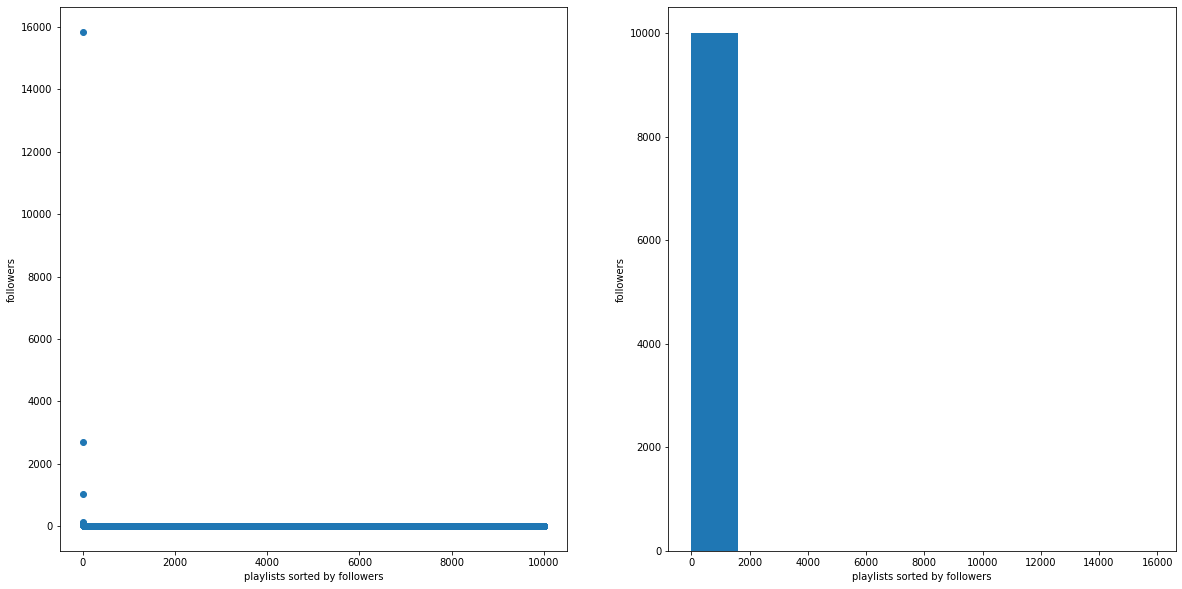

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].scatter(dataset.index, dataset.num_followers)
axs[0].set_xlabel('playlists sorted by followers')
axs[0].set_ylabel('followers')

# axs[1].hist(dataset.num_followers)
# axs[1].set_xlabel('playlists sorted by followers')
# axs[1].set_ylabel('followers')
plt.show()